###  INICIALIZAÇÃO

#### Importação de bibliotecas

In [19]:
import os
from exif import Image as Im
from PIL import Image

import pandas as pd

#### Acessando o banco de dados

In [20]:
#main_dir = r'C:\Users\Vitor\Desktop\IC\Cod\maquinavirtual\maqvirtual'
#os.chdir(main_dir)
os.getcwd()
#pwd, ls


'c:\\Users\\Vitor\\Desktop\\IC\\Cod\\maquinavirtual\\maqvirtual'

In [21]:

d = {'fileName': [], 'Coordenada':[], 'Assunto':[], "Texto":[],'ID':[] }


#### Coordenadas

In [23]:
# graus decimais
def dec_coord(coords, ref): 
    decimal_degrees = coords[0] + coords[1] / 60 + coords[2] / 3600 
    if ref == 'S' or ref == 'W': 
        decimal_degrees = -decimal_degrees 
    return decimal_degrees

#### informação da imagem

In [24]:
def prop_img(fileName):

    end_img =  'Imagem' + '\\'+ fileName

    with open(end_img, 'rb') as arq_img: ## wb escrita
        img = Im(arq_img)
        if(img.has_exif):
            try:
                dec_lat = dec_coord(img.gps_latitude,img.gps_latitude_ref)
                dec_lon = dec_coord(img.gps_longitude, img.gps_longitude_ref)
                return (str(dec_lat) + ',' + str(dec_lon))
            except:
                print('erro no exif')
                return -1



####  E-mails

In [25]:
########################## Usar esse para baixar imagem ##########################
import email
import imaplib

EMAIL = 'jaguarfb2015@gmail.com'
PASSWORD ='toorpljtqpzkgqif'

#EMAIL = 'vitorhgsd@gmail.com'
#PASSWORD = 'xaeliekypnnpjiqv'

SERVER = 'imap.gmail.com'

# abriremos uma conexão com SSL com o servidor de emails
mail = imaplib.IMAP4_SSL(SERVER)
mail.login(EMAIL, PASSWORD)

# selecionamos a caixa de entrada neste caso
mail.select('inbox')

status, data = mail.search(None, 'ALL')
# Busca em email que não foram abertos
#status, data = mail.search(None, ('UNSEEN'))

mail_ids = []

for block in data:
    mail_ids += block.split()

for i in mail_ids:
    # a função fetch baixa o email passando id e o formato
    status, data = mail.fetch(i, '(RFC822)')
  
    message1 = email.message_from_string(data[0][1].decode('utf-8'))
    list_fileName = []

    for a in message1.walk():
        #print('AA:\n',a)
        #print('===========fim do a ----------------')
        if a.get_content_type() == 'image/jpeg':
            fileName = a.get_filename()
            foto = a.get_payload(decode=True)
            print('fileName2: ',fileName)
            with open(f'Imagem\{fileName}','wb')as arquivo:
                arquivo.write(foto)
            list_fileName.append(fileName)

        if a.get_content_type() == 'application/octet-stream':
            fileName = a.get_filename()
            foto = a.get_payload(decode=True)
            print('fileName1: ',fileName)
            with open(f'Imagem\{fileName}','wb')as arquivo:
                arquivo.write(foto)
            list_fileName.append(fileName)

        if a.get_content_type() == 'text/plain':
            msg = a.get_payload()
           # print('mensagem: ',msg)

        if a.get('Subject') is not None:
            ass = a.get('Subject') 
            print('assunto: ',ass)
    
    #Escrevendo na planilha
    if len(list_fileName) > 0: 
        print("################### Entrou ####################3")
        for fileName in list_fileName:
            coord = prop_img(fileName) # coord igual a -1 se não tem exif

            d['Assunto'].append(ass)
            d['fileName'].append(fileName)
            d['ID'].append(i)
            d['Texto'].append(msg)
            d['Coordenada'].append(coord)

    print('id = ',i)
    print('------------------------outro email-----------------------------------------------')


assunto:  =?UTF-8?Q?Julio_Cesar_De=2C_conclua_a_configura=C3=A7=C3=A3o_da_sua_nova?=
	=?UTF-8?Q?_Conta_do_Google?=
id =  b'1'
------------------------outro email-----------------------------------------------
assunto:  Re: Faz Bodoquena
id =  b'2'
------------------------outro email-----------------------------------------------
assunto:  =?UTF-8?Q?Julio_Cesar_De=2C_confirme_as_configura=C3=A7=C3=B5es_da_sua_C?=
	=?UTF-8?Q?onta_do_Google_para_dar_o_pr=C3=B3ximo_passo_no_seu_dispositivo_?=
	=?UTF-8?Q?Mac?=
id =  b'3'
------------------------outro email-----------------------------------------------
assunto:  Delivery Status Notification (Failure)
assunto:  Oncas Fazenda Bodoquena
id =  b'4'
------------------------outro email-----------------------------------------------
assunto:  Delivery Status Notification (Failure)
assunto:  Oncas Fazenda Bodoquena
id =  b'5'
------------------------outro email-----------------------------------------------
assunto:  Delivery Status Notification (F

#### Finalizando

In [27]:
#Gravar os dados em excel
dados = pd.DataFrame(data=d)
dados.to_excel('Dados\\dados.xlsx', index=False)

In [28]:

matrix = pd.read_excel('Dados\dados.xlsx')
matrix

fileName  \
0   c5a9435b-a1d7-43b4-973c-16f733e6a8cd.JPG   
1   e889829e-59de-4686-9d21-b7d44616464b.JPG   
2   3960e32b-53b1-400b-8677-8aefda4ead5f.JPG   
3   c23a5077-32ff-4c6e-82cb-3831634e38ae.JPG   
4   2c39a941-d5ba-4847-b3fa-b4b3c22b92f6.JPG   
5   be668031-756b-4f21-b4c6-0101859c4452.JPG   
6   65c0601c-0991-41f2-880f-6907eeaa8c41.JPG   
7   5b2c952e-63d8-4ea9-9295-6c140dc491c6.JPG   
8   8a8700bf-cc37-434a-9063-abfff2f65782.JPG   
9   675c8105-2edf-49f8-9d54-0e7318712090.JPG   
10  4cc2fbde-3228-47da-8859-328c8c725e73.JPG   
11  35e54642-c35f-444c-a837-5fc0134ef00f.JPG   
12             TimePhoto_20220713_143439.jpg   
13             TimePhoto_20220713_143358.jpg   
14             TimePhoto_20220726_073654.jpg   
15             TimePhoto_20220716_083056.jpg   
16             TimePhoto_20220726_073652.jpg   
17             TimePhoto_20220714_151206.jpg   
18             TimePhoto_20220714_151202.jpg   
19               IMG_20220708_091647_113.jpg   
20               IMG_20220708_091651_107.jpg   
21                              IMG-2751.jpg   
22                              IMG-2755.jpg   
23                              IMG-2756.jpg   
24                              IMG-2757.jpg   
25                              IMG-3672.jpg   
26                              IMG-3756.jpg   

                                 Coordenada Assunto Texto     ID  
0                                        -1     JCS    \n  b'13'  
1                                        -1     JCS    \n  b'13'  
2                                        -1     JCS    \n  b'13'  
3                                        -1     JCS    \n  b'13'  
4                                        -1     JCS    \n  b'13'  
5                                        -1     JCS    \n  b'13'  
6                                        -1     JCS    \n  b'13'  
7                                        -1     JCS    \n  b'13'  
8                                        -1     JCS    \n  b'13'  
9                                        -1     JCS    \n  b'13'  
10                                       -1     JCS    \n  b'13'  
11                                       -1     JCS    \n  b'13'  
12   -20.114994722222225,-56.76097472222222     NaN    \n  b'18'  
13   -20.11502638888889,-56.760984722222226     NaN    \n  b'18'  
14    -20.08902472222222,-56.80046972222222     NaN    \n  b'18'  
15             -20.09468,-56.80375972222222     NaN    \n  b'18'  
16  -20.088999722222223,-56.800466666666665     NaN    \n  b'18'  
17  -20.097331388888886,-56.811234999999996     NaN    \n  b'18'  
18   -20.097326666666664,-56.81121638888889     NaN    \n  b'18'  
19                                       -1     NaN    \n  b'18'  
20                                       -1     NaN    \n  b'18'  
21   -19.995183333333333,-56.88666944444444     NaN    \n  b'19'  
22            -19.995425,-56.88795833333333     NaN    \n  b'19'  
23    -19.99538888888889,-56.88794722222222     NaN    \n  b'19'  
24              -19.9954,-56.88794722222222     NaN    \n  b'19'  
25   -19.978563888888885,-56.89830277777778     NaN    \n  b'19'  
26    -20.10206666666667,-56.79708888888889     NaN    \n  b'19'

### Acessando imagens


In [1]:
print(len(d['fileName']))
print(len(d['Coordenada']))
print(len(d['Assunto']))
print(len(d["Texto"]))
print(len(d['ID']))

[2]

In [73]:
end_img = r'C:\Users\Vitor\Desktop\IC\Cod\maquinavirtual\maqvirtual\Imagem\20220726_090026.jpg'
#end_img = r'Imagem\20220726_090026.jpg'
with open(end_img, 'rb') as arq_img: ## wb escrita
    img = Im(arq_img)
    print(img.has_exif)
    print(end_img)
    print(img.get_all())
    #a = img.list_all()

unable to read tag 'components_configuration'
unable to read tag 'maker_note'
unable to read tag 'flashpix_version'
unable to read tag '_interoperability_ifd_Pointer'
unable to read tag 'scene_type'


True
C:\Users\Vitor\Desktop\IC\Cod\maquinavirtual\maqvirtual\Imagem\20220726_090026.jpg
{'image_width': 4128, 'image_height': 3096, 'make': 'samsung', 'model': 'SM-J600GT', 'orientation': <Orientation.RIGHT_TOP: 6>, 'x_resolution': 72.0, 'y_resolution': 72.0, 'resolution_unit': <ResolutionUnit.INCHES: 2>, 'software': 'J600GTVJUACUG2', 'datetime': '2022:07:26 09:00:26', 'y_and_c_positioning': 1, '_exif_ifd_pointer': 240, '_gps_ifd_pointer': 988, 'compression': 6, 'jpeg_interchange_format': 1324, 'jpeg_interchange_format_length': 17729, 'exposure_time': 0.05, 'f_number': 1.9, 'exposure_program': <ExposureProgram.NORMAL_PROGRAM: 2>, 'photographic_sensitivity': 400, 'exif_version': '0220', 'datetime_original': '2022:07:26 09:00:26', 'datetime_digitized': '2022:07:26 09:00:26', 'shutter_speed_value': 4.32, 'aperture_value': 1.85, 'brightness_value': -1.29, 'exposure_bias_value': 0.0, 'max_aperture_value': 1.85, 'metering_mode': <MeteringMode.CENTER_WEIGHTED_AVERAGE: 2>, 'flash': Flash(flash

In [ ]:
for nom_img in matrix['fileName']:
    name_img = '\\'+nom_img
    end_img =  main_dir + f'\Imagem'
    end_img =  end_img + name_img
    with open(end_img, 'rb') as arq_img: ## wb escrita
        img = Im(arq_img)
        print(img.has_exif)
        #print(name_img)
        #print(img.gps_latitude)
        #print(img.list_all())


In [138]:
with open(end_img, 'rb') as arq_img: ## wb escrita
    img = Im(arq_img)
    img.has_exif

In [ ]:
#img.list_all()

In [23]:
print(img.gps_latitude)
print(img.gps_latitude_ref)
print(img.gps_longitude)
print(img.gps_longitude_ref)

(0, 0, 0)

(0, 0, 0)



C:\Users\Vitor\AppData\Local\Temp\ipykernel_11156\1413727936.py:2: RuntimeWarning: ASCII tag contains 1 fewer bytes than specified
  print(img.gps_latitude_ref)
C:\Users\Vitor\AppData\Local\Temp\ipykernel_11156\1413727936.py:4: RuntimeWarning: ASCII tag contains 1 fewer bytes than specified
  print(img.gps_longitude_ref)


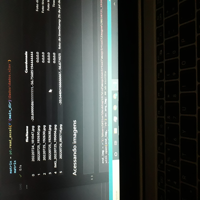

In [24]:
from PIL import Image
end_img = r'Imagem\20220726_090026.jpg'
imag = Image.open(end_img)
imag.resize((200,200))